In [3]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta, date
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

stock_name_list = []
while len(stock_name_list) < 6:
    stockname = input("Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5").upper()
    if stockname == 'Q':
        break
    else:
        stock_name_list.append(stockname)
        continue

syear = int(input("Enter the year started"))
smonth = int(input("Enter the month 1-12"))
sday = int(input("Enter the day 1-31"))

sdate = datetime(syear, smonth, sday)
add = timedelta(days = 1)
edate = sdate + add
current_date = datetime.now()

def change_time(sdate, edate, add):
    sdate += add
    edate += add
    return sdate, edate

stocklist = []
for stockname in stock_name_list:
    stock = yf.download(stockname, start=sdate, end=current_date, interval="1d", progress=False)
        
    stock['Average Price'] = (stock['High'] + stock['Low']) / 2
    stock["Percent Change"] = stock["Average Price"].pct_change()
    stock.drop(["Close", "Open", "Volume"], axis = 1, inplace = True)

    stocklist.append(stock)

for stock in stocklist:
    display(stock)


Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5 qqq
Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5 q
Enter the year started 2025
Enter the month 1-12 7
Enter the day 1-31 21


Price,High,Low,Average Price,Percent Change
Ticker,QQQ,QQQ,,
Date,,,,
2025-07-21,565.404550,561.409181,563.406866,NaN
2025-07-22,563.696484,557.963140,560.829812,-0.004574
2025-07-23,563.197097,558.932083,561.064590,0.000419
2025-07-24,565.584330,562.637734,564.111032,0.005430
2025-07-25,567.042649,563.616628,565.329639,0.002160
...,...,...,...,...
2025-11-26,616.190002,610.390015,613.290009,0.015734
2025-11-28,619.320007,615.419983,617.369995,0.006653


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 7
Enter the day 1-31 22
Enter money put in ex. 50 1000


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 8
Enter the day 1-31 4
Enter money put in ex. 50 300


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 10
Enter the day 1-31 8
Enter money put in ex. 50 700


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 8
Enter the day 1-31 1
Enter money put in ex. 50 6000


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 11
Enter the day 1-31 12
Enter money put in ex. 50 20000


Enter the date and money inputed, enter q for year when done


Enter the year q


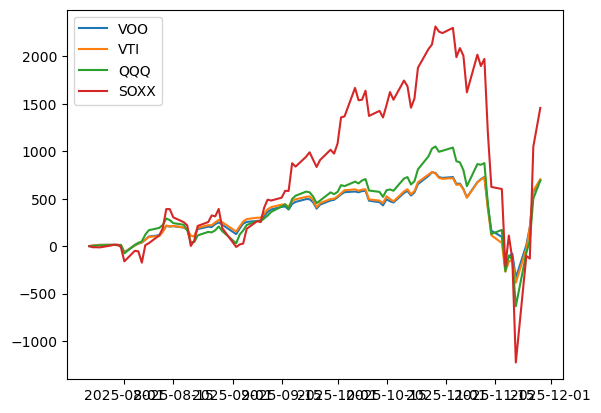

In [369]:
user_standings = pd.DataFrame(index = stocklist[0].index)
user_standings["Money In"] = 0.0

amount = 0
stock["Money In"] = 0.0
stock["Shares Owned"] = 0.0
total_shares_list = [0.0] * len(stocklist)


while True:
    print("Enter the date and money inputed, enter q for year when done")
    year = input("Enter the year")
    
    if year == "q":
        break
    else:
        year = int(year)
    month = int(input("Enter the month 1-12"))
    day = int(input("Enter the day 1-31"))
    added = int(input("Enter money put in ex. 50"))
    amount += added
    
    for i, stock in enumerate(stocklist):
        
        price = stock.loc[datetime(year, month, day), "Average Price"]
        bought = added / price
        total_shares_list[i] += bought
    
        mask = stock.index >= datetime(year, month, day)
        stock.loc[mask, "Shares Owned"] = float(total_shares_list[i])
        stock.loc[mask, "Money In"] = amount


for stock in stocklist:
    stock["Equity"] = (stock["Shares Owned"] * stock["Average Price"])
    stock["Total Return"] = round((stock["Equity"] - stock["Money In"]), 2)
    plt.plot(stock["Total Return"])

plt.legend(stock_name_list)
plt.show()



In [371]:
final_return = 0
for stock in stocklist:
    final_return += stock["Total Return"].iloc[-1]
print("Your final return amount is: $", final_return)

Your final return amount is: $ 3548.37
